# INNOTECH Austin 2019: Data Cleansing Strategies

<center><font color="red"><h3>94% of businesses suspect that their customer and prospect data is inaccurate!</h3></font></center>

**Data cleansing** is the process of detecting and correcting (or removing) corrupt or inaccurate records from a data set and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

**Resources:**

 * [Data Cleansing on Wikipedia](https://en.wikipedia.org/wiki/Data_cleansing)
 * [35+ Statistics About Dirty Data](https://blog.zoominfo.com/the-effect-of-dirty-data-on-roi/)
 * [Car Features and MSRP](https://www.kaggle.com/CooperUnion/cardataset/data)

## Connect Google Drive on Colab

**Google Colaboratory** (or Colab) is a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use:
 * [Overview of Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
 * [Colab FAQ](https://research.google.com/colaboratory/faq.html)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/'My Drive'/Data-Cleansing-Innotech

## Import Required Packages

**NumPy** is a library for Python which adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays:
 * [NumPy on Wikipedia](https://en.wikipedia.org/wiki/NumPy)
 * [NumPy website](https://numpy.org/)

In [1]:
import numpy as np
print("NumPy version:", np.__version__)

NumPy version: 1.17.3


**Pandas** is a library for Python which adds high-performance, easy-to-use data structures, along with data manipulation and analysis tools:
 * [Pandas on Wikipedia](https://en.wikipedia.org/wiki/Pandas_(software))
 * [Pandas website](https://pandas.pydata.org/)

In [2]:
import pandas as pd
print("Pandas version:", pd.__version__)

Pandas version: 0.25.2


**Matplotlib** is a plotting library for Python and its numerical mathematics extension NumPy:
 * [Matplotlib on Wikipedia](https://en.wikipedia.org/wiki/Matplotlib)
 * [Matplotlib website](https://matplotlib.org/)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib version:", matplotlib.__version__)

Matplotlib version: 3.1.1


**Scikit-learn** is a machine learning library for Python. It features various classification, regression and clustering algorithms and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy:
 * [Scikit-learn on Wikipedia](https://en.wikipedia.org/wiki/Scikit-learn)
 * [Scikit-learn website](https://scikit-learn.org/stable/)

In [4]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, make_scorer, mean_squared_error

Scikit-learn version: 0.21.3


## Read in Data

In this analysis we used data set with car features including make, model, year, engine, and other properties of the car used to predict its price. This data set was scraped from [edmunds.com](https://www.edmunds.com/) - an American online resource for automotive information. All details on the dataset can be found at its [kaggle page](https://www.kaggle.com/CooperUnion/cardataset/data).

First, we read the data set into pandas data frame:

In [5]:
df_cars_pop_msrp = pd.read_csv("../data/raw/Cars_Popularity_MSRP.csv")

Shape (number of rows, number of columns) of the data frame is the following:

In [6]:
df_cars_pop_msrp.shape

(11914, 16)

Print out information on the columns of the data set:

In [7]:
df_cars_pop_msrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
Highway MPG          11914 non-null int64
City MPG             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


From the information above we conclude that the data set is pretty much clean, for most columns they have 11914 non-null object. `Engine HP` is the column that has 11845 non-null float64, i.e. 69 records are **missing**. `Engine Cylinders` has 30 missing records and `Market Category` has largest number of 3742 missing records.

Let's look into statistics for numerical columns:

In [8]:
df_cars_pop_msrp.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Let's also look into random 10 records:

In [9]:
df_cars_pop_msrp.sample(10, random_state = 1).head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
4257,Lotus,Evora 400,2017,premium unleaded (required),400.0,6.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,39,21,613,91900
11151,Aston Martin,V8 Vantage,2014,premium unleaded (required),420.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,21,14,259,136900
5262,Hyundai,Genesis,2015,regular unleaded,311.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Performance",Large,Sedan,29,18,1439,38000
8965,Suzuki,Samurai,1993,regular unleaded,66.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,Convertible SUV,26,24,481,2000
7380,Mitsubishi,Outlander,2015,regular unleaded,166.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,29,24,436,26195
9012,GMC,Savana Cargo,2015,flex-fuel (unleaded/E85),285.0,8.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Large,Cargo Van,17,11,549,33760
5879,Subaru,Impreza,2016,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,23595
1578,Chevrolet,Avalanche,2011,flex-fuel (unleaded/E85),320.0,8.0,AUTOMATIC,four wheel drive,4.0,"Crossover,Flex Fuel",Large,Crew Cab Pickup,21,15,1385,42455
2400,Volkswagen,CC,2015,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,31,22,873,35375
2416,Volkswagen,CC,2016,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,32,21,873,34655


## Data Matrix for ML Estimator

Create a function that accepts data frame and returns matrix `X` and vector `Y` for machine learning estimator:

In [10]:
def PrepDataMatrix(df):
    X = df.copy()
    X.fillna(0, inplace=True)
    Z = X.pop('Engine Cylinders')
    Xmake = X['Make']
    Xmodel = X['Model']
    # Turns categorical data into binary values across columns
    #X = pd.get_dummies(X, dummy_na = False, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] )
    #X = pd.get_dummies(X, dummy_na = False, columns=['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] )
    X = pd.get_dummies(X, dummy_na = False, columns=['Engine Fuel Type', 'Transmission Type', 'Driven Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] )
    #X.insert(0, 'Model', Xmodel);
    #X.insert(0, 'Make', Xmake);
    Y = X.pop('MSRP')
    return shuffle(X,Y, random_state = 1)

In [11]:
X,Y = PrepDataMatrix(df_cars_pop_msrp)

In [12]:
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,Make,Model,Year,Engine HP,Number of Doors,Highway MPG,City MPG,Popularity,Engine Fuel Type_0,Engine Fuel Type_diesel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
4257,Lotus,Evora 400,2017,400.0,2.0,39,21,613,0,0,...,0,0,1,0,0,0,0,0,0,0
11151,Aston Martin,V8 Vantage,2014,420.0,2.0,21,14,259,0,0,...,1,0,0,0,0,0,0,0,0,0
5262,Hyundai,Genesis,2015,311.0,4.0,29,18,1439,0,0,...,0,0,0,0,0,0,0,0,1,0
8965,Suzuki,Samurai,1993,66.0,2.0,26,24,481,0,0,...,0,1,0,0,0,0,0,0,0,0
7380,Mitsubishi,Outlander,2015,166.0,4.0,29,24,436,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,Audi,Q5,2016,272.0,4.0,26,18,3105,0,0,...,0,0,0,0,0,0,0,0,0,0
10955,Toyota,Tundra,2015,381.0,4.0,17,13,2031,0,0,...,0,0,0,1,0,0,0,0,0,0
905,Saab,900,1997,150.0,4.0,26,18,376,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,Pontiac,G6,2009,164.0,2.0,33,22,210,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
df_new1 = df_cars_pop_msrp.copy()
df_new2 = df_cars_pop_msrp.copy()
df_new2['Engine HP Missing'] = df_new2['Engine HP']

In [14]:
print(type(Y))
Y

<class 'pandas.core.series.Series'>


4257      91900
11151    136900
5262      38000
8965       2000
7380      26195
          ...  
7813      53500
10955     47975
905        2000
5192      22220
235       32315
Name: MSRP, Length: 11914, dtype: int64

## Training and testing data sets

Split data set into 2 parts: training (90%) and testing (10%)

In [15]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.10, random_state=2)
MSE_Scorer = make_scorer(mean_squared_error)

Drop model/make columns so they are not used in the model, but we can re-use them later to estimate how they correlate with model's prediction and see overpriced model/makes (see orignal work on [kaggle page](https://www.kaggle.com/CooperUnion/cardataset/data)).

In [16]:
X_trn2 = X_trn.drop('Make', axis = 1).drop('Model', axis = 1)
X_tst2 = X_tst.drop('Make', axis = 1).drop('Model', axis = 1)

Let's check that `Make` and `Model` columns disappeared from the data matrix:

In [17]:
X_trn2

,Year,Engine HP,Number of Doors,Highway MPG,City MPG,Popularity,Engine Fuel Type_0,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
9037,1998,290.0,2.0,23,17,454,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6720,2012,132.0,4.0,32,25,2031,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10993,2016,310.0,4.0,18,14,2031,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9856,2014,164.0,4.0,31,23,1720,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4359,2009,292.0,4.0,19,14,5657,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,2009,210.0,4.0,20,16,436,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
269,2007,306.0,2.0,24,17,2009,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6749,2005,178.0,2.0,24,18,586,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10701,2015,275.0,3.0,19,14,5657,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Machine Learning Model

Build **Random Forest** model which is a machine learning method for classification, regression and other tasks that operates by constructing a multitude of **[decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)** at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

 * [Random Forest on Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
 * [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
 * [`scikit-learn` User Guide](https://scikit-learn.org/stable/modules/ensemble.html#forest)

In [18]:
rfr = RandomForestRegressor(n_estimators=100, max_features="auto", random_state=11)

Train model using data matrix `X_trn2` and vector `Y`:

In [19]:
%%time
rfr.fit(X_trn2, Y_trn)

Wall time: 11.5 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=11, verbose=0,
                      warm_start=False)

## Cross-Validation and Errors

Perform **cross-validation** to evaluate estimator performance
 * [`scikit-learn` User Guide](https://scikit-learn.org/stable/modules/cross_validation.html)
 * [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

The mean score and the 95% confidence interval of the score estimate:

In [20]:
%%time
scores = cross_val_score(rfr, X_tst2, Y_tst, cv = 5)

Wall time: 5.58 s


In [21]:
accuracy = scores.mean()
print("Accuracy: %0.2f" % accuracy)

Accuracy: 0.90


Calculate predicted values using test sample:

In [22]:
Y_prd = rfr.predict(X_tst2)

In [23]:
mean_error = sum(abs(Y_tst-Y_prd))/len(Y_tst)
mean_error_p = 100*mean_error/np.mean(Y_tst)
print("Mean absolute error:", mean_error)
print("Mean percent error: ", mean_error_p)

Mean absolute error: 3049.003861290586
Mean percent error:  8.028335797760814


## What features most predict price?

Get the importances for each features and calculate standard deviations for them:

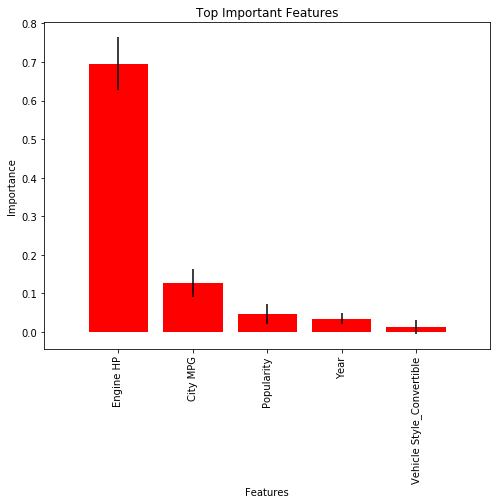

In [24]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get the feature names
features = X_tst2.columns.values

# Want the top 5 features, so limit the indices and labels
topLimit = 5 # limit to show up to, ex. top 10
indices = indices[0: topLimit] # indices for features
topLabels = features[indices[0: topLimit]] # actual feature labels, we want to print these

# Plot the feature importances of the forest (top 20)
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top Important Features")
ax = plt.bar(range(topLimit), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [25]:
importances[indices]

array([0.69584586, 0.12631871, 0.04600594, 0.03499244, 0.01411152])

## Introduce Missing Values

Now we randomly sample 5000 records (approximately 50%) from data set and replace values in `Engine HP` with `None` - effectively introduce missing values into the most importnat feature:

In [26]:
df_idx1 = df_cars_pop_msrp.sample(5000, random_state = 1).index

In [27]:
df_new1.loc[df_idx1, 'Engine HP'] = None

Prepare data matrix for regression:

In [28]:
X,Y = PrepDataMatrix(df_new1)

Split data in test and train sets:

In [29]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.10, random_state=2)
MSE_Scorer = make_scorer(mean_squared_error)

Drop make and model:

In [30]:
X_trn2 = X_trn.drop('Make', axis = 1).drop('Model', axis = 1)
X_tst2 = X_tst.drop('Make', axis = 1).drop('Model', axis = 1)

Run fit for Random Forest regression:

In [31]:
%%time
rfr.fit(X_trn2, Y_trn)

Wall time: 10.6 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=11, verbose=0,
                      warm_start=False)

Calculate cross-validation scores:

In [32]:
%%time
scores = cross_val_score(rfr, X_tst2, Y_tst, cv = 5)

Wall time: 4.93 s


Accuracy of the new regression with missing values:

In [33]:
accuracy_new1 = scores.mean()
print("Accuracy: %0.2f" % accuracy_new1)

Accuracy: 0.83


Calculate predicted values:

In [34]:
Y_prd = rfr.predict(X_tst2)

Calculate absolute and relative error on the prediction:

In [35]:
mean_error1 = sum(abs(Y_tst-Y_prd))/len(Y_tst)
mean_error_p1 = 100*mean_error1/np.mean(Y_tst)
print("Mean absolute error:", mean_error1)
print("Mean percent error: ", mean_error_p1)

Mean absolute error: 4209.0945395249
Mean percent error:  11.082971982043931


Calculate importance factors for all features and plot top 5:

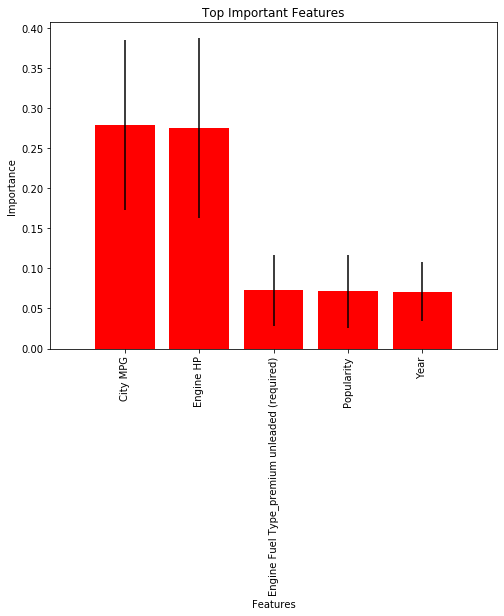

In [36]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get the feature names
features = X_tst2.columns.values

# Want the top 5 features, so limit the indices and labels
topLimit = 5 # limit to show up to, ex. top 10
indices = indices[0: topLimit] # indices for features
topLabels = features[indices[0: topLimit]] # actual feature labels, we want to print these

# Plot the feature importances of the forest (top 20)
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top Important Features")
ax = plt.bar(range(topLimit), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Print top 5 important features:

In [37]:
importances[indices]

array([0.27858024, 0.2753146 , 0.07269339, 0.07140282, 0.07064314])

## Introduce Missing Values and Missing Label

Similarly to above we randomly sample 5000 records (approximately 50%) from data set and replace values in `Engine HP` with `None` - effectively introduce missing values into the most importnat feature.

Also we introduce new feature `Engine HP Missing` with `1` for missing values in `Engine HP` and `0` for present values in `Engine HP`.

In [38]:
df_new2.loc[df_idx1, 'Engine HP'] = None
df_new2.loc[df_new2.index.difference(df_idx1), 'Engine HP Missing'] = 0

Prepare data matrix for regression:

In [39]:
X,Y = PrepDataMatrix(df_new2)

Split data in test and train sets:

In [40]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.10, random_state=2)
MSE_Scorer = make_scorer(mean_squared_error)

Drop make and model:

In [41]:
X_trn2 = X_trn.drop('Make', axis = 1).drop('Model', axis = 1)
X_tst2 = X_tst.drop('Make', axis = 1).drop('Model', axis = 1)

Run fit for Random Forest regression:

In [42]:
%%time
rfr.fit(X_trn2, Y_trn)

Wall time: 11.9 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=11, verbose=0,
                      warm_start=False)

Calculate cross-validation scores:

In [43]:
%%time
scores = cross_val_score(rfr, X_tst2, Y_tst, cv = 5)

Wall time: 5.55 s


Accuracy of the new regression with missing values:

In [44]:
accuracy_new2 = scores.mean()
print("Accuracy: %0.2f" % accuracy_new2)

Accuracy: 0.86


Calculate predicted values:

In [45]:
Y_prd = rfr.predict(X_tst2)

Calculate absolute and relative error on the prediction:

In [46]:
mean_error2 = sum(abs(Y_tst-Y_prd))/len(Y_tst)
mean_error_p2 = 100*mean_error2/np.mean(Y_tst)
print("Mean absolute error:", mean_error2)
print("Mean percent error: ", mean_error_p2)

Mean absolute error: 3671.989780322733
Mean percent error:  9.668720783416308


Calculate importance factors for all features and plot top 5:

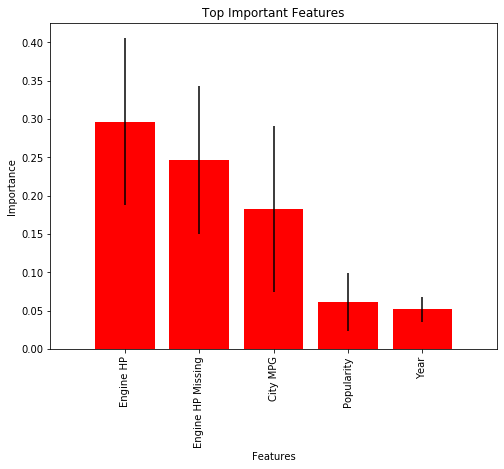

In [47]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get the feature names
features = X_tst2.columns.values

# Want the top 5 features, so limit the indices and labels
topLimit = 5 # limit to show up to, ex. top 10
indices = indices[0: topLimit] # indices for features
topLabels = features[indices[0: topLimit]] # actual feature labels, we want to print these

# Plot the feature importances of the forest (top 20)
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top Important Features")
ax = plt.bar(range(topLimit), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Print top 5 important features:

In [48]:
importances[indices]

array([0.29655469, 0.24667878, 0.1822816 , 0.0616351 , 0.05172673])

## Results

Finally, we compare results for accuracies and mean errors (in percents) for three cases:
 * original data with no missing values
 * data with ~50% values in `Engine HP` missing
 * data with ~50% values in `Engine HP` missing but with new feature that labels missing data

In [49]:
print("*** Original data ***")
print("Accuracy: %0.2f" % accuracy)
print("Mean percent error: %0.2f" % mean_error_p)
print()
print("*** Introduce missing values for Engine HP ***")
print("Accuracy: %0.2f" % accuracy_new1)
print("Mean percent error: %0.2f" % mean_error_p1)
print()
print("*** Add column with missing labels for Engine HP ***")
print("Accuracy: %0.2f" % accuracy_new2)
print("Mean percent error: %0.2f" % mean_error_p2)

*** Original data ***
Accuracy: 0.90
Mean percent error: 8.03

*** Introduce missing values for Engine HP ***
Accuracy: 0.83
Mean percent error: 11.08

*** Add column with missing labels for Engine HP ***
Accuracy: 0.86
Mean percent error: 9.67
